In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#fluo = np.fromfile('/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/09.01.16/Pos0000/nparrays/fluo.np')
#mxll = np.fromfile('/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/09.01.16/Pos0000/nparrays/max_ll.np')
#pos = np.fromfile('/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/09.01.16/Pos0000/nparrays/pos.np')
fluo = np.fromfile('./nparrays/fluo.np')
mxll = np.fromfile('./nparrays/max_ll.np')
pos = np.fromfile('./nparrays/pos.np')

In [35]:
print(fluo.shape)


nt = 9
gx,gy = 36,36
print(gx*gy*3*nt)
fluo = fluo.reshape(gx,gy,nt,3)
mxll = mxll.reshape(gx,gy,nt)
pos = pos.reshape(gx,gy,nt,2)



(34992,)
34992


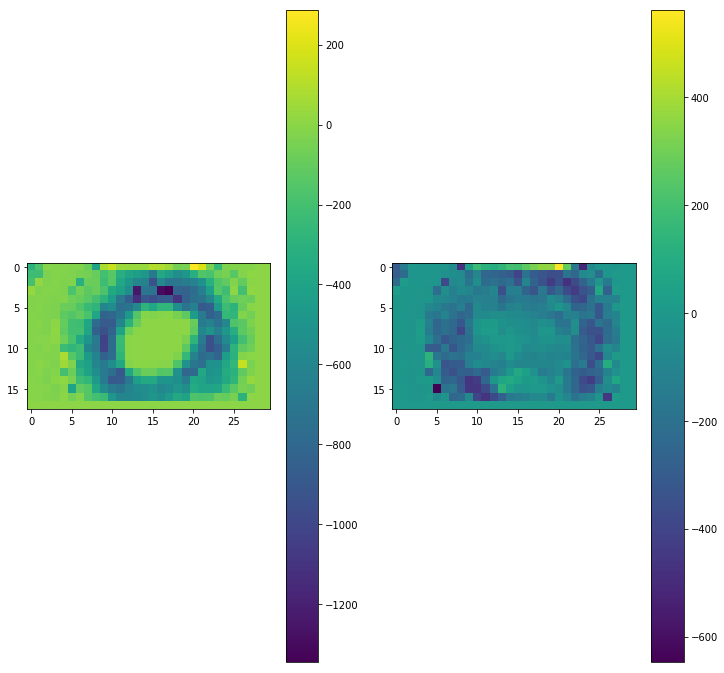

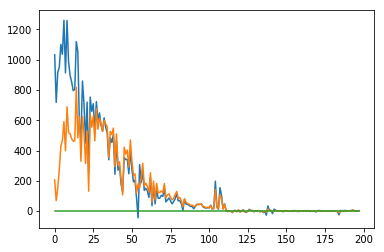

In [12]:
plt.figure(figsize=(12,12))
df = np.diff(fluo,axis=2)
plt.subplot(1,2,1)
plt.imshow(df[:,:,0,0])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(df[:,:,0,1])
plt.colorbar()

plt.figure()
plt.plot(-df[9,9,:,:])

No handles with labels found to put in legend.


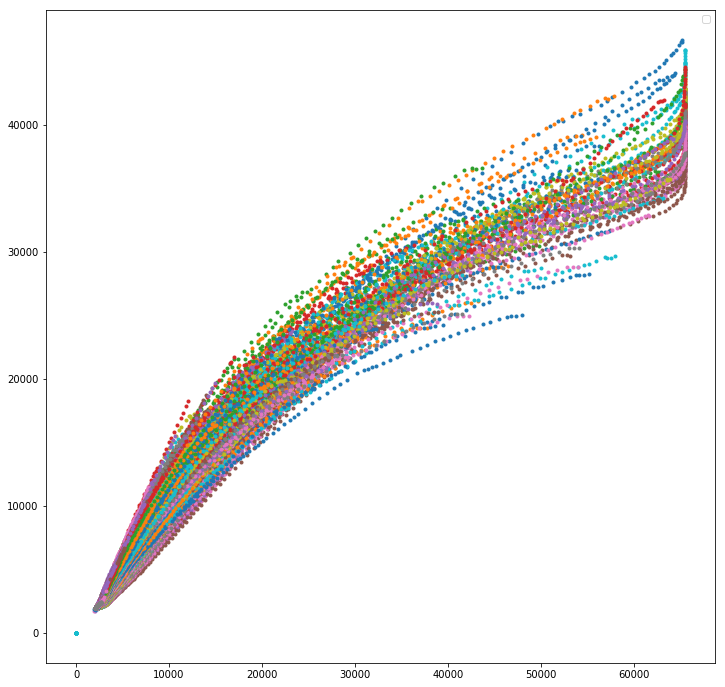

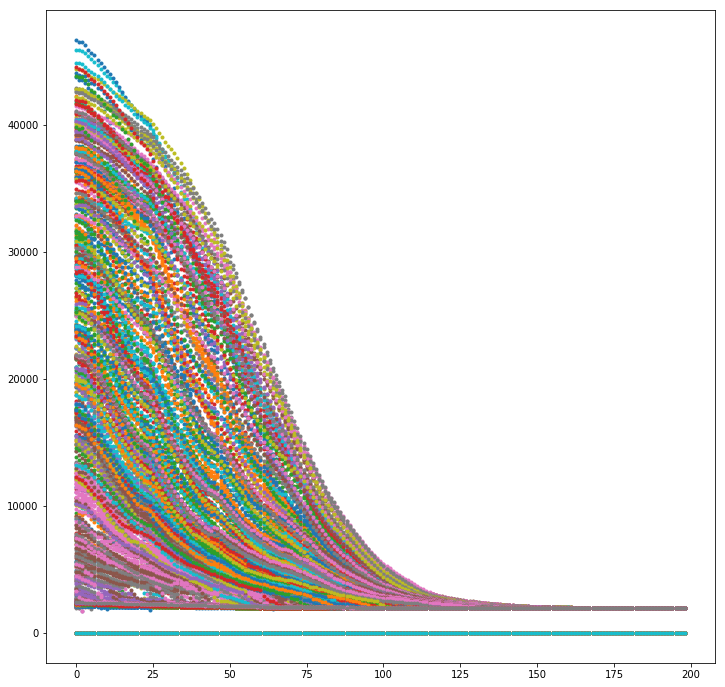

In [13]:
plt.figure(figsize=(12,12))
rfluo = fluo.reshape((gx*gy,nt,3))
plt.plot(rfluo[:,:,0].transpose(), rfluo[:,:,1].transpose(), '.')
plt.legend()

plt.figure(figsize=(12,12))
_ = plt.plot(np.real(rfluo[:,:,1].transpose()), '.')


IndexError: index 18 is out of bounds for axis 0 with size 18

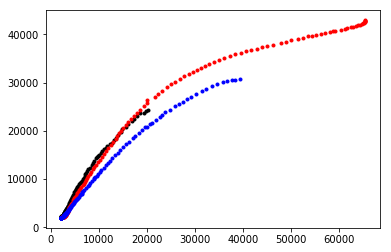

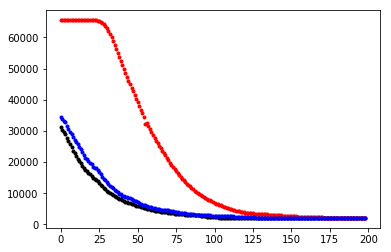

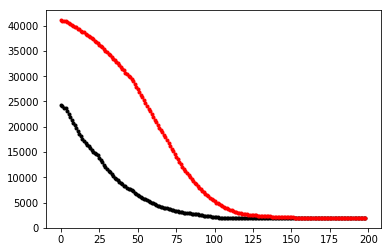

In [14]:
plt.plot(fluo[2,12,:,0].ravel(), fluo[2,17,:,1].ravel(), 'k.')
plt.plot(fluo[9,12,:,0].ravel(), fluo[9,17,:,1].ravel(), 'r.')
plt.plot(fluo[9,9,:,0].ravel(), fluo[9,9,:,1].ravel(), 'b.')
plt.figure()
plt.plot(np.real(fluo[2,17,:,0]).ravel(), 'k.')
plt.plot(np.real(fluo[9,17,:,0]).ravel(), 'r.')
plt.plot(np.real(fluo[7,9,:,0]).ravel(), 'b.')
plt.figure()
plt.plot(np.real(fluo[2,17,:,1]).ravel(), 'k.')
plt.plot(np.real(fluo[11,17,:,1]).ravel(), 'r.')
plt.plot(np.real(fluo[18,18,:,1]).ravel(), 'b.')

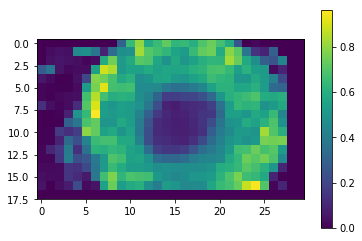

In [15]:
plt.imshow(-mxll[:,:,8])
plt.colorbar()

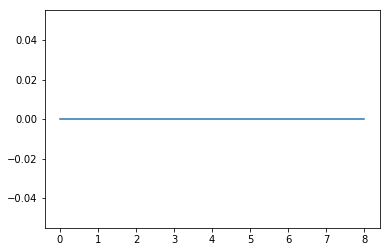

In [40]:
import scipy
from scipy.interpolate import UnivariateSpline

t = np.arange(nt)
spl0 = UnivariateSpline(t, fluo[5,17,:,0], s=1e5)
spl1 = UnivariateSpline(t, fluo[5,17,:,1], s=1e5)
plt.plot(spl0.derivative()(t))

[6.38820735e-01 1.44989004e+03]


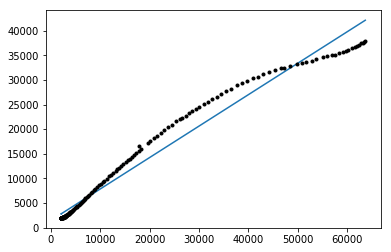

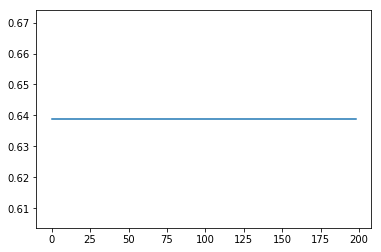

In [17]:
x,y = fluo[5,17,:,0], fluo[5,17,:,1]
pp = np.polyfit(x,y, 1)
p = np.poly1d(pp)
plt.plot(x,p(x))
plt.plot(x,y,'k.')

pd = np.polyder(p)
plt.figure()
plt.plot(t,pd(x))

print(pp)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[6.77587192e-01 1.12576255e+03]


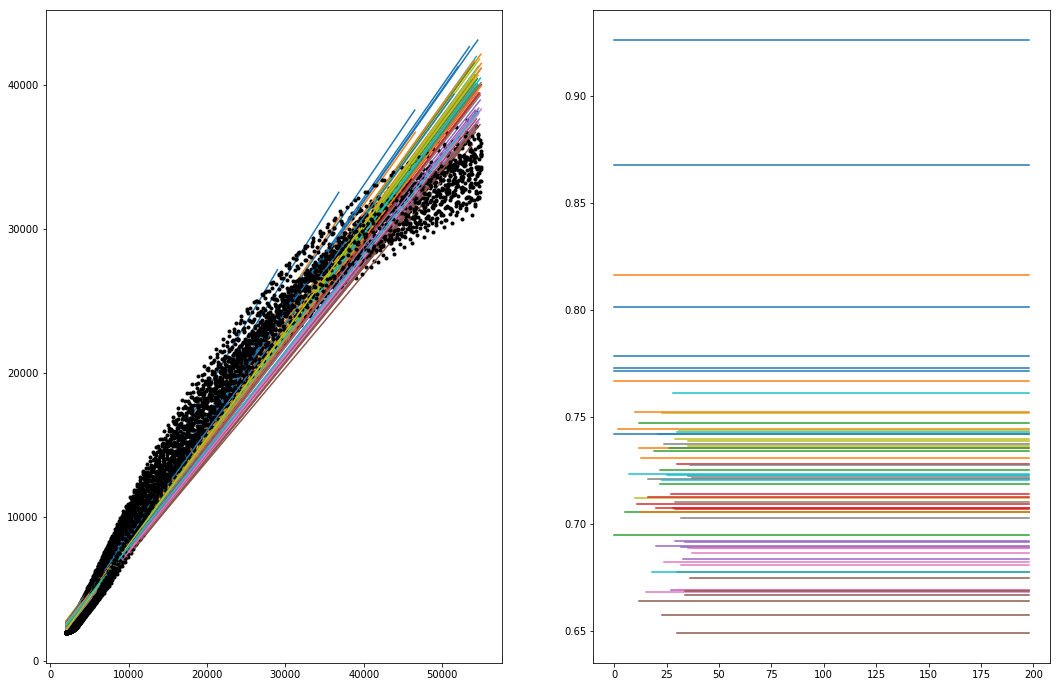

In [18]:
plt.figure(figsize=(18,12))
for i in range(5,12):
    for j in range(10,20):
        x,y = fluo[i,j,0:,0], fluo[i,j,0:,1]
        tt = t[x<55000]
        y = y[x<55000]
        x = x[x<55000]

        pp = np.polyfit(x,y, 1)
        p = np.poly1d(pp)
        plt.subplot(1,2,1)
        plt.plot(x,p(x))
        plt.plot(x,y,'k.')

        plt.subplot(1,2,2)
        pd = np.polyder(p)
        plt.plot(tt,pd(x))
        #plt.ylim([0,1])

print(pp)

163.28901557788726 279.71978035687215
154.71176812998084 279.8688847015132
154.71176812998084 279.8688847015132
154.71176812998084 279.8688847015132


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log


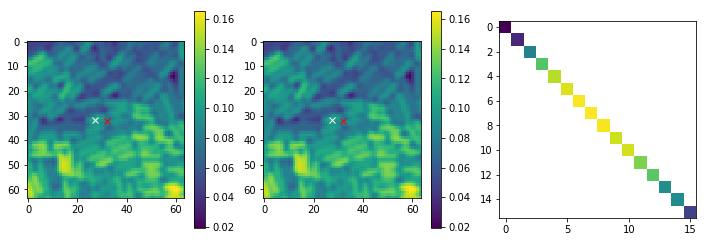

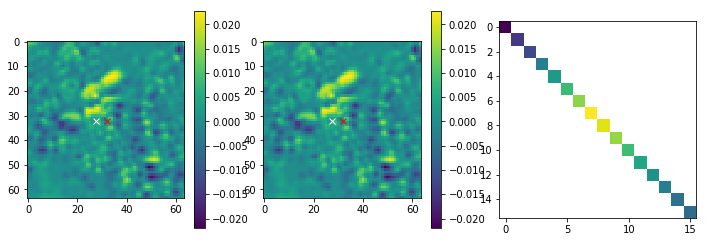

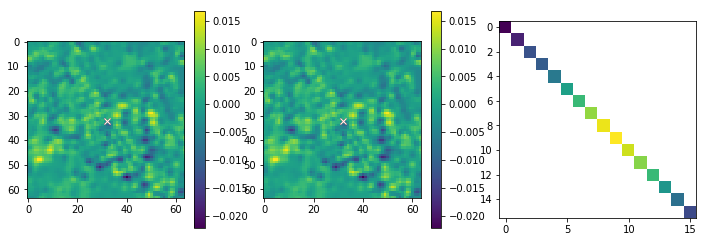

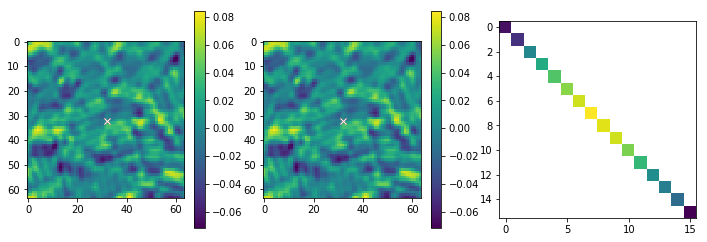

In [37]:
import skimage
from skimage.io import imread
from skimage.filters import gaussian
import infotheory
%matplotlib inline
#fname = '/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/09.01.16/Pos0000/aligned_Frame%04dStep%04d.tiff'
fname = '/home/timrudge/cellmodeller/data/poisson-18-08-24-16-55/step-%05d.png'
#fname = '/home/timrudge/cellmodeller/data/info_tracking-18-08-08-10-06/step-%05d.png'
startframe = 0
#plt.figure(figsize=(12,12))
#plt.imshow()
ix,iy = 10,17
cim = np.zeros((64,64,3))
roi1 = np.zeros((64,64,nt))
roi2 = np.zeros((64,64,nt))
for t in range(1,nt):
    im1 = imread(fname%(startframe+t*2+600))
    im1 = gaussian(im1[0:-1:2,0:-1:2], 1)
    im2 = imread(fname%(startframe+t*2+600))
    im2 = gaussian(im2[0:-1:2,0:-1:2],1)
    px = int(pos[ix,iy,nt-t,0])
    py = int(pos[ix,iy,nt-t,1])
    sim1 = im1[px:px+64,py:py+64]
    sim2 = im2[px:px+64,py:py+64]
    roi1[:,:,t] = sim1
    roi2[:,:,t] = sim2

mi = np.zeros((nt,))
hy = np.zeros((nt,))
for t in range(1,nt,2):
    plt.figure(figsize=(12,4))

    sim1 = roi1[:,:,t] - roi1[:,:,t-1]
    sim2 = roi2[:,:,t] - roi2[:,:,t-1]
    
    hgram2d, xedges, yedges = np.histogram2d( sim1.ravel(), \
                                            sim2.ravel(), \
                                            bins=16)

    mi[t] = infotheory.mutual_information(hgram2d)
    hgram, edges = np.histogram( sim1.ravel(), \
                                            bins=16)

    hy[t] = infotheory.entropy(hgram)
    
    #plt.subplot(1,3,1)
    #plt.imshow(sim1)
    #plt.plot(32,32,'rx')
    #plt.colorbar()
    #plt.subplot(1,3,2)
    #plt.imshow(sim2)
    #plt.plot(32,32,'rx')
    #plt.colorbar()

    #plt.subplot(1,3,3)
    cim[:,:,0] = sim1/np.max(sim1)
    cim[:,:,1] = sim2/np.max(sim2)
    #plt.imshow(cim)

    #plt.plot(sim1.ravel(), sim2.ravel(), '.')
    px = (pos[ix,iy,t,0])
    py = (pos[ix,iy,t,1])
    px0 = (pos[ix,iy,t-1,0])
    py0 = (pos[ix,iy,t-1,1])
    print(px,py)
    
    plt.subplot(1,3,1)
    plt.imshow(sim1)
    plt.plot(32,32,'rx')
    plt.plot(32+px-px0,32+py-py0,'wx')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(sim2)
    plt.plot(32,32,'rx')
    plt.plot(32+px-px0,32+py-py0,'wx')
    plt.colorbar()
    
    plt.subplot(1,3,3)
    plt.imshow(np.log(hgram2d))

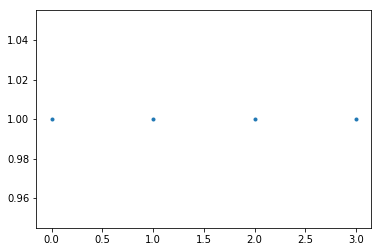

In [38]:
plt.plot(mi[mi>0]/hy[mi>0], '.')
#plt.figure()
#plt.plot(-mxll[ix,iy,:])